In [40]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
#mnist = modified national institute of standards and technology database

In [41]:
#DOWNLOADING TRAINING DATA

dataset = MNIST(root='data/' , download=True)
#MNIST=MODIFIED NATIONAL INSTITUTE OF STANDARDS AND TECHNOLOGY DATASETS.

In [42]:
len(dataset) # we have 60k datasets here for training the model . 

60000

In [43]:
dataset = MNIST(root='data/' , train=False)  # here we have 10k datasets for testing the model.
len(dataset)

10000

In [44]:
dataset = MNIST(root='data/' , train=True)  # training datasets 60k
len(dataset)

60000

In [45]:
dataset[0]  # 28x28 image , 5 label image

(<PIL.Image.Image image mode=L size=28x28 at 0x10DA94BF580>, 5)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline  
# these command helps to see the images in our jupyter not as a popup.
#for more commands like these visit.  https://ipython.reasthedocs.io/en/stable/interactive/magics.html.

label: 5


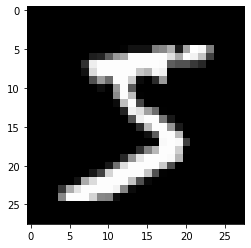

In [47]:
image, label = dataset[0]
plt.imshow(image, cmap= 'gray')  #colourmap=cmap
print('label:', label)

label: 3


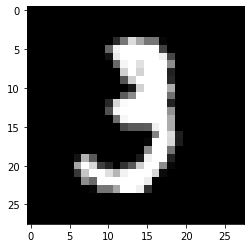

In [48]:
image, label = dataset[10]
plt.imshow(image, cmap= 'gray')  #colourmap=cmap
print('label:', label)

In [49]:
#ok WE GOT IMAGES BUT PYTORCH DOES'NT KNOW HOW TO WORK WITH IMAGES , IT WORKS ONLY WITH TENSORS.SO WE NEED TO CONVERT IT INTO TENSORS

import torchvision .transforms as transforms

# here we use "ToTensor" transform to convert the images to tensors.

In [50]:
#MNIST DATASET (images , labels)
dataset = MNIST(root='data/' , train=True, transform=transforms.ToTensor())

In [51]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# here the is converted to tensor of (1x28x28) tensor.the first dimension is used to keep track of colour channels.but in grayscale 
# so they're just one channel. other datasets have images with three colour channels ,red,green,blue(RGB).
#AND other (28x28)  gives height and width.

torch.Size([1, 28, 28]) 5


In [52]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))  #max=torch(1.)=white region , min=torch(0.)=black region in image
# here we calculate the intensity of dataset[0] from 20 to 25 in both x and y axis
# in output there is zeroes(minimum) rpresents dark black , and values in decimals represents white.higher value more white.

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [53]:
print(img_tensor[:,5:15,5:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118,
          0.0706, 0.0706],
         [0.0000, 0.0000, 0.0000, 0.1176, 0.1412, 0.3686, 0.6039, 0.6667,
          0.9922, 0.9922],
         [0.0000, 0.0000, 0.1922, 0.9333, 0.9922, 0.9922, 0.9922, 0.9922,
          0.9922, 0.9922],
         [0.0000, 0.0000, 0.0706, 0.8588, 0.9922, 0.9922, 0.9922, 0.9922,
          0.9922, 0.7765],
         [0.0000, 0.0000, 0.0000, 0.3137, 0.6118, 0.4196, 0.9922, 0.9922,
          0.8039, 0.0431],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.0039, 0.6039, 0.9922,
          0.3529, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5451, 0.9922,
          0.7451, 0.0078],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.7451,
          0.9922, 0.2745],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373,
          0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.3176,

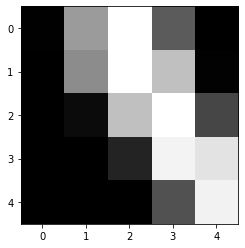

In [54]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');
#here "IMSHOW" helps to plot the region , 

In [55]:
#TRAINING AND VALIDATION DATASETS;
#while building the model we split the data into three sets 
#1.) training set: train the model, compute loss and adjust the weights of the model using gradient descent.
#2.)validation set:used to evaluate the model while training , adjust hyperparameter (learning rate,etc), and picks the best version of model.
#3.)test set : used to compare different models , or different types of modeling approaches, and report the final accuracy of the model.

#here we have60k training dataset there is no validation set , we only split it accordingly for our use of model.

In [56]:
def split_indices(n, val_pct):   # we know n= 60k
    #determine size of validation set
    n_val = int(val_pct*n)
    #create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    #pick first n_val indices for validation
    return idxs[n_val:], idxs[:n_val]

In [57]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)
#here we take 20% of total n to val_pct.

In [58]:
print(len(train_indices), len(val_indices))
print('sample val indices: ' , val_indices[:10])
#48k for training, 12k for validation.
#here we get shuffled val_pct data 

48000 12000
sample val indices:  [30082 45645 32425 32104 51003  8743 44044 56723  7816  3686]


In [59]:
#CREATING THE PYTORCH DATALOADER FOR EACH OF THESE USING THE "SUBSETRANDOMSAMPLER" ,which samples elements randomly from a given list of indices

In [60]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [61]:
batch_size = 100
#we create batches for our training and validation dataset.
#training sampler and dataloader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

#validation sampler and dataloader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset , batch_size , sampler=train_sampler)


In [62]:
#MODEL
#logistic is similar to linear regression.where output is sum of all inputs multiplied with weights 
#pred = x@w.t()+b
#here also we use "nn.linear" to create a model , and nn.linear expects each training example to be vector, so each(1x28x28) 
#image  tensor needs to be flattened out into a vector of size 784(28x28) befor passsing into the model.
#the output for each image is vector of size 10.

In [63]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#logistic regression model
model = nn.Linear(input_size , num_classes)

In [64]:
#CREATING WEIGHTS
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0092, -0.0041, -0.0336,  ..., -0.0218,  0.0259, -0.0290],
        [ 0.0354, -0.0341, -0.0130,  ..., -0.0036,  0.0302, -0.0060],
        [-0.0354,  0.0335, -0.0092,  ...,  0.0139, -0.0238, -0.0085],
        ...,
        [ 0.0259,  0.0220, -0.0228,  ..., -0.0176, -0.0162, -0.0249],
        [-0.0215, -0.0043,  0.0012,  ...,  0.0079,  0.0035,  0.0179],
        [ 0.0037,  0.0215,  0.0296,  ...,  0.0226, -0.0286, -0.0176]],
       requires_grad=True)

In [65]:
#CREATING BIAS
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0067, -0.0286,  0.0306,  0.0094, -0.0020, -0.0145, -0.0198, -0.0296,
        -0.0065, -0.0156], requires_grad=True)

In [66]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break
    #we get error of showing the model images , because the shape is not matching one is (28x28) and another one is (784 )

tensor([1, 6, 3, 7, 9, 2, 0, 3, 9, 7, 3, 9, 0, 0, 8, 0, 6, 1, 1, 9, 0, 5, 8, 0,
        1, 6, 8, 8, 7, 8, 0, 3, 5, 1, 8, 7, 3, 7, 3, 4, 6, 4, 7, 0, 9, 4, 0, 6,
        8, 4, 0, 6, 8, 4, 0, 7, 7, 1, 6, 7, 6, 9, 2, 3, 4, 0, 6, 0, 8, 3, 8, 5,
        3, 5, 7, 9, 0, 8, 7, 7, 9, 5, 2, 7, 4, 2, 2, 8, 3, 0, 5, 8, 1, 8, 3, 5,
        7, 9, 2, 3])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [ ]:
#the error above is because of the input data doesnt have the right shape , our images are of shape 1x28x28 , but we need 784, 
#so we need to flatten , for that we use ".reshape" mthod of a tensor , which helps us to view efficiently view each images as
#a flat vector without really changing the underlying data.

#we include a custom model by extending the nn.module class from pytorch.

In [67]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [68]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [69]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0279, -0.0348, -0.0328,  ...,  0.0217,  0.0054, -0.0280],
         [ 0.0258,  0.0054, -0.0341,  ..., -0.0092, -0.0203, -0.0012],
         [ 0.0163,  0.0353, -0.0250,  ..., -0.0281, -0.0120, -0.0228],
         ...,
         [ 0.0213,  0.0228, -0.0096,  ...,  0.0316,  0.0183,  0.0122],
         [ 0.0179,  0.0157,  0.0342,  ..., -0.0039, -0.0041, -0.0168],
         [ 0.0184,  0.0064, -0.0077,  ..., -0.0142,  0.0132,  0.0061]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0169, -0.0273,  0.0265,  0.0317,  0.0153,  0.0204, -0.0326,  0.0300,
          0.0183, -0.0274], requires_grad=True)]

In [70]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs.shape: ', outputs.shape)
print('Sample outputs:\n', outputs[:3].data)
#here we get a model images , by converting the 28x28 into vector .
#for every image there are ten(10) classes

outputs.shape:  torch.Size([100, 10])
Sample outputs:
 tensor([[ 1.3579e-01, -6.3904e-02,  2.7110e-02, -1.4010e-01, -2.1289e-01,
         -1.0043e-01,  2.0502e-02, -1.2730e-01,  1.0918e-01,  8.8363e-02],
        [-9.4032e-02,  2.2026e-02, -5.0344e-02, -1.8742e-01, -3.4288e-01,
          1.2376e-01,  1.1110e-01,  4.5179e-02,  2.4784e-02, -4.5173e-02],
        [ 1.8942e-01,  1.4572e-02,  2.1869e-01,  1.2516e-01,  1.4549e-01,
         -4.6556e-01, -4.6326e-04, -1.1562e-03, -1.3421e-01, -1.1508e-01]])


In [ ]:
# TO CONVERT THE OUTPUT ROWS TO PROBABILITY WE USE SOFTMAX FUNCTION, where we have [eyi/summation eyi] , where y is the value from output

In [71]:
import torch.nn.functional as F


#apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#look at sample probabilities
print("Sample probablities:\n" , probs[:4].data)

#add up the probabilitites of an output row
print("sum: ", torch.sum(probs[0]).item())   # calculating the sum for 0 row 
#here we calculated probability of all numbers
# # and we know in probability sum of all values is equal to one(1), more equal to 1.

Sample probablities:
 tensor([[0.1169, 0.0957, 0.1048, 0.0887, 0.0825, 0.0923, 0.1041, 0.0898, 0.1138,
         0.1114],
        [0.0939, 0.1054, 0.0980, 0.0855, 0.0732, 0.1167, 0.1152, 0.1079, 0.1057,
         0.0986],
        [0.1191, 0.1000, 0.1226, 0.1117, 0.1140, 0.0619, 0.0985, 0.0984, 0.0862,
         0.0878],
        [0.1055, 0.0897, 0.1000, 0.0852, 0.1366, 0.0778, 0.0978, 0.1180, 0.0939,
         0.0956]])
sum:  0.9999999403953552


In [72]:
max_probs , preds = torch.max(probs, dim=1)   # here torch.max picks the best probability and best indices among all.
print(preds) #gives random labels
print(max_probs)

tensor([0, 5, 2, 4, 8, 8, 8, 6, 0, 0, 0, 2, 0, 7, 6, 8, 2, 9, 6, 6, 0, 6, 8, 0,
        8, 0, 0, 6, 0, 6, 8, 1, 1, 0, 8, 2, 0, 0, 8, 6, 5, 7, 0, 7, 2, 8, 6, 8,
        8, 8, 0, 0, 0, 6, 8, 5, 3, 7, 0, 6, 8, 8, 0, 8, 1, 5, 0, 7, 1, 8, 1, 8,
        1, 6, 2, 7, 3, 0, 0, 2, 2, 6, 5, 5, 7, 2, 2, 2, 0, 8, 6, 0, 4, 0, 6, 0,
        5, 7, 0, 8])
tensor([0.1169, 0.1167, 0.1226, 0.1366, 0.1611, 0.1258, 0.1238, 0.1272, 0.1409,
        0.1274, 0.1289, 0.1568, 0.1473, 0.1326, 0.1262, 0.1158, 0.1268, 0.1246,
        0.1154, 0.1154, 0.1206, 0.1413, 0.1194, 0.1174, 0.1551, 0.1438, 0.1081,
        0.1411, 0.1161, 0.1185, 0.1441, 0.1315, 0.1407, 0.1241, 0.1373, 0.1080,
        0.1358, 0.1236, 0.1291, 0.1437, 0.1372, 0.1322, 0.1413, 0.1296, 0.1272,
        0.1504, 0.1143, 0.1242, 0.1311, 0.1290, 0.1529, 0.1460, 0.1190, 0.1127,
        0.1336, 0.1267, 0.1211, 0.1239, 0.1253, 0.1188, 0.1304, 0.1452, 0.1314,
        0.1445, 0.1207, 0.1220, 0.1331, 0.1525, 0.1215, 0.1412, 0.1308, 0.1497,
        0.1186, 0.1

In [73]:
labels   # actual labels

tensor([1, 6, 3, 3, 0, 3, 2, 6, 6, 3, 5, 6, 5, 0, 7, 1, 0, 1, 4, 7, 7, 0, 1, 8,
        0, 6, 5, 7, 5, 9, 8, 8, 4, 3, 5, 1, 6, 8, 5, 5, 4, 3, 0, 3, 4, 2, 7, 6,
        8, 5, 6, 6, 8, 2, 5, 7, 3, 7, 7, 7, 6, 5, 3, 6, 5, 4, 2, 7, 9, 0, 8, 0,
        7, 8, 4, 9, 3, 7, 8, 9, 0, 5, 9, 6, 2, 2, 0, 8, 6, 6, 3, 5, 3, 6, 2, 1,
        7, 9, 9, 4])

In [74]:
torch.sum(labels == preds).item() / len(labels) 
#return true if both are same. 

0.09

In [75]:
# EVALUATION METRIC AND LOSS FUNCTION
#in linear regression we need a way to evaluate how well our model. but the natural wa to find these is to finding the percentage
#of labels correctlythat were predicted correctly, that is finding the accuracy.

def accuracy(l1,l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [76]:
accuracy(preds, labels)

0.09

In [ ]:
#unlike accuracy , cross entropy is a continous and differentiable function that also provides good feesback for incremental 
#imporvements in a model.(a slightly higher probability for the correct label lead to the lower loss.)

In [77]:
loss_fn = F.cross_entropy

In [78]:
#loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2949, grad_fn=<NllLossBackward0>)


In [79]:
#OPTIMIZER
#we are going to use optim.SGD to update the weights and biases during training, but with the higher learning rate of 1e-3

learning_rate = 0.001  # hyperparameter , helps to train model as soon as .
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [80]:
#TRAINING THE MODEL
def loss_batch(model, loss_func , xb , yb , opt=None , metric = None):
    #calculate loss
    preds = model(xb)
    loss = loss_func(preds , yb)
    
    if opt is not None:
        #compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #reset gradients
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        #compute the metric
        metric_result = metric(preds , yb)
    
    return loss.item(), len(xb) , metric_result

In [81]:
def evaluate(model, loss_fn, valid_d1, metric=None):
    with torch.no_grad():
        #pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb, yb in valid_d1]
        #separate losses, count and metrics
        losses, nums, metrics = zip(*results)  # we separate the batch into three lists by zip
        
        #total size of the datasize
        total = np.sum(nums)
        #avg.loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            #avg \. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [82]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds==labels).item() / len(preds)

In [83]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('loss: {:.4f}, Accuracy: {:4f}' .format(val_loss, val_acc))

loss: 2.2878, Accuracy: 0.099625


In [84]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        #training
        for xb, yb in train_dl:
            losss,_,_=loss_batch(model, loss_fn, xb, yb, opt)
            
            #evaluation
            result = evaluate(model, loss_fn, valid_dl, metric)
            val_loss, total, val_metric = result
            
            #print progress
            if metric is None:
                print('eoch [{}/{}], Loss: {:.4f}'
                      .format(epoch+1, epochs, val_loss))
            else:
                print('epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                     .format(epoch+1, epochs, val_loss, metric.__name__,val_metric))

In [85]:
#redefine the model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [86]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)
#here the  loss getting decreased and the accuray keeps increasing

epoch [1/5], Loss: 2.3760, accuracy: 0.0318
epoch [1/5], Loss: 2.3749, accuracy: 0.0323
epoch [1/5], Loss: 2.3739, accuracy: 0.0328


KeyboardInterrupt: 

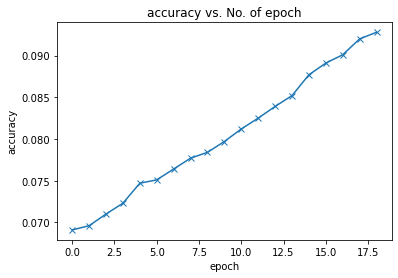

In [87]:
#replace these values with your result
accuracies = [0.0691, 0.0696, 0.0710, 0.0723, 0.0747,
              0.0751, 0.0764, 0.0777, 0.0784, 0.0797,
              0.0812, 0.0825, 0.0839, 0.0852, 0.0877,
              0.0891, 0.0901, 0.0920, 0.0928]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs. No. of epoch');
#here the accuracy increases linearly 

In [ ]:
#TESTING WITH INDIVIDUAL IMAGES

In [88]:
#define tese dataset
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

shape: torch.Size([1, 28, 28])
label: 7


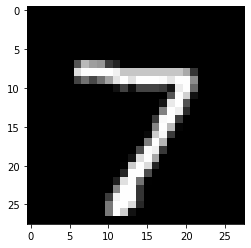

In [89]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('shape:', img.shape)
print('label:', label)

In [90]:
img.unsqueeze(0).shape  # it converts the image into batch of only one image, it just adds another dimension

torch.Size([1, 1, 28, 28])

In [91]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

label: 7 ,predicted: 6


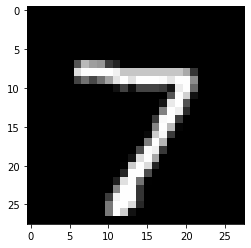

In [92]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('label:', label, ',predicted:', predict_image(img, model))

label: 0 ,predicted: 4


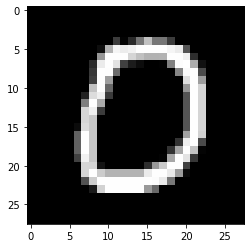

In [93]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('label:', label, ',predicted:', predict_image(img, model))

label: 9 ,predicted: 7


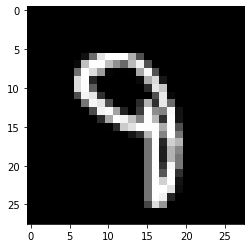

In [94]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('label:', label, ',predicted:', predict_image(img, model))

label: 4 ,predicted: 7


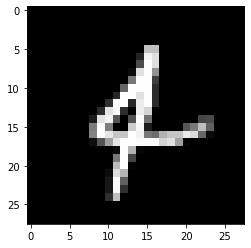

In [95]:
img, label = test_dataset[300]
plt.imshow(img[0], cmap='gray')
print('label:', label, ',predicted:', predict_image(img, model))

label: 2 ,predicted: 6


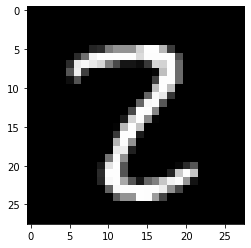

In [96]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('label:', label, ',predicted:', predict_image(img, model))

In [97]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('loss: {:.4f}, accuracy: {:.4f}'.format(test_loss, test_acc))
#it is good test accuracy

loss: 2.3734, accuracy: 0.0317


In [98]:
#SAVING AND LOADING THE MODEL
torch.save(model.state_dict(), 'mnist-logistic.pth')
#model.state_dict() contains a weight and biases

In [99]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0235, -0.0187, -0.0278,  ..., -0.0247,  0.0305, -0.0130],
                      [ 0.0056,  0.0143,  0.0002,  ..., -0.0080, -0.0058,  0.0253],
                      [-0.0187,  0.0140,  0.0095,  ..., -0.0077, -0.0297, -0.0334],
                      ...,
                      [ 0.0158, -0.0159, -0.0277,  ..., -0.0296, -0.0263, -0.0207],
                      [ 0.0089, -0.0098,  0.0142,  ...,  0.0027,  0.0207, -0.0332],
                      [-0.0260, -0.0343,  0.0185,  ..., -0.0101,  0.0119,  0.0290]])),
             ('linear.bias',
              tensor([ 0.0258,  0.0343, -0.0062, -0.0147,  0.0148,  0.0144, -0.0240,  0.0320,
                      -0.0049, -0.0108]))])

In [100]:
#here we copy the weights and biases from model1 to model2
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0235, -0.0187, -0.0278,  ..., -0.0247,  0.0305, -0.0130],
                      [ 0.0056,  0.0143,  0.0002,  ..., -0.0080, -0.0058,  0.0253],
                      [-0.0187,  0.0140,  0.0095,  ..., -0.0077, -0.0297, -0.0334],
                      ...,
                      [ 0.0158, -0.0159, -0.0277,  ..., -0.0296, -0.0263, -0.0207],
                      [ 0.0089, -0.0098,  0.0142,  ...,  0.0027,  0.0207, -0.0332],
                      [-0.0260, -0.0343,  0.0185,  ..., -0.0101,  0.0119,  0.0290]])),
             ('linear.bias',
              tensor([ 0.0258,  0.0343, -0.0062, -0.0147,  0.0148,  0.0144, -0.0240,  0.0320,
                      -0.0049, -0.0108]))])

In [101]:
test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print('loss: {:.4f}, accuracy: {:.4f}'.format(test_loss, test_acc))

#here we get the same accuracy

loss: 2.3734, accuracy: 0.0317


In [ ]:
## Summary and Further Reading

#We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:

# Working with images in PyTorch (using the MNIST dataset)
# Splitting a dataset into training, validation and test sets
# Creating PyTorch models with custom logic by extending the `nn.Module` class
# Interpreting model ouputs as probabilities using softmax, and picking predicted labels
# Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
# Setting up a training loop that also evaluates the model using the validation set
# Testing the model manually on randomly picked examples 
# Saving and loading model checkpoints to avoid retraining from scratch

#There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

# Try making the validation set smaller or larger, and see how it affects the model.
# Try changing the learning rate and see if you can achieve the same accuracy in fewer epochs.
# Try changing the batch size. What happens if you use too high a batch size, or too low?
# Modify the `fit` function to also track the overall loss and accuracy on the training set, and see how it compares with the validation loss/accuracy. Can you explain why it's lower/higher?
# Train with a small subset of the data, and see if you can reach a similar level of accuracy.
# Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

